# Multilevel modification on predefined DR-embedding

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import pandas as pd
import umap.plot
from ucimlrepo import fetch_ucirepo

d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, erro

In [3]:
import sys

sys.path.append("../")
import visualization
import processing
import evaluation

## UCI-ID 159, MAGIC Gamma Telescope

### Import

In [4]:
# fetch dataset (available at https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)
dataset = fetch_ucirepo(id=159)

# data (as pandas dataframes)
X_uci159 = pd.DataFrame(dataset.data.features, dtype="float16")
y_uci159 = pd.DataFrame(dataset.data.targets)

target_feature_uci159 = "fConc1"

X_uci159.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.796875,16.000000,2.644531,0.391846,0.198242,27.703125,22.015625,-8.203125,40.093750,81.875
1,31.609375,11.726562,2.517578,0.530273,0.377197,26.265625,23.828125,-9.960938,6.359375,205.250
2,162.000000,136.000000,4.062500,0.037415,0.018707,116.750000,-64.875000,-45.218750,76.937500,256.750
3,23.812500,9.570312,2.337891,0.614746,0.392090,27.203125,-6.464844,-7.152344,10.445312,116.750
4,75.125000,30.921875,3.160156,0.316895,0.183228,-5.527344,28.546875,21.843750,4.648438,356.500


In [5]:
X_uci159 = X_uci159[:10000]

### Compute initial UMAP-Embedding

In [6]:
umap_mapper_uci159 = umap.UMAP(n_neighbors=5, min_dist=1, random_state=0)
umap_mapper_uci159.fit(X_uci159)
umap_embedding_uci159 = umap_mapper_uci159.embedding_
graph_umap_knn_uci159 = umap_mapper_uci159.graph_

graph_umap_knn_uci159 = nx.Graph(graph_umap_knn_uci159)

d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [7]:
pairwise_distances_uci159 = processing.compute_pairwise_dists(
    X_uci159, invert=False, sim_features=[target_feature_uci159]
)

for u, v in graph_umap_knn_uci159.edges():
    graph_umap_knn_uci159[u][v]["weight"] = pairwise_distances_uci159[u][v]

### Compute Modifications

In [8]:
embeddings_uci159 = processing.compute_multilevel_dr(
    graph=graph_umap_knn_uci159,
    initial_pos=umap_embedding_uci159,
    pairwise_dists=pairwise_distances_uci159,
    mst=False,
    boundary_edges=False,
    threshold=None,
)

------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 1


d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\networkx\drawing\layout.py:724: RuntimeWarning: divide by zero encountered in divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


Computation finished after 193.73 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 2
Computation finished after 351.41 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 3
Computation finished after 43.59 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 4
Computation finished after 14.17 seconds
------------------------------------------------------------


In [9]:
for emb in embeddings_uci159:
    emb.labels = {i: X_uci159.at[i, target_feature_uci159] for i in range(len(X_uci159))}

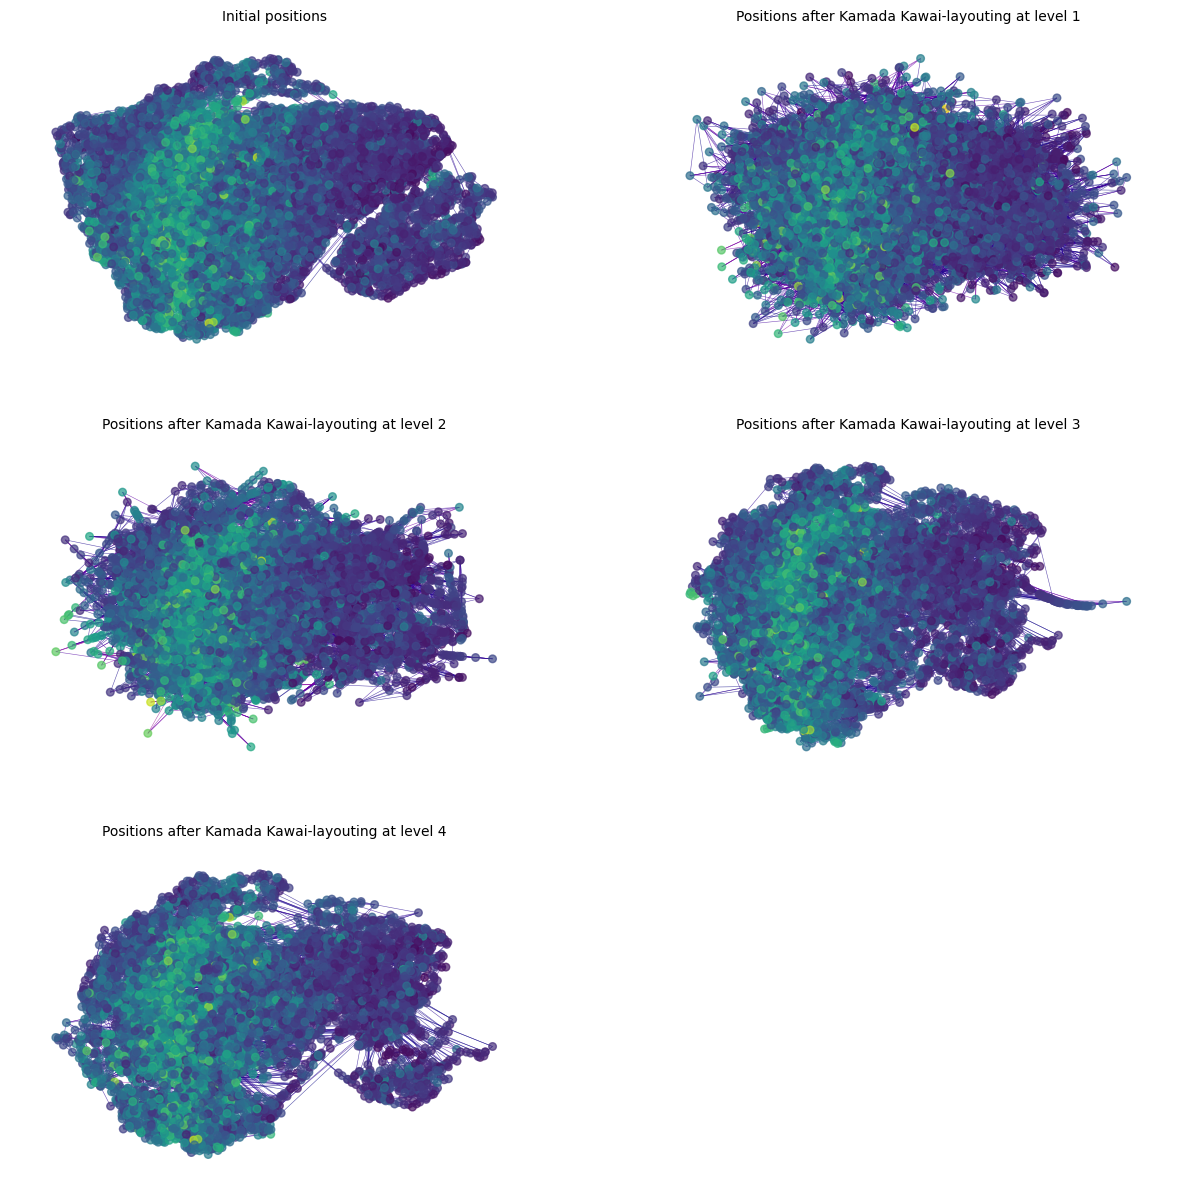

In [10]:
visualization.display_graphs(
    embeddings_uci159,
    figsize_columns=2,
    figsize=(15, 15),
    show_edges=True,
    cmap="viridis",
    show_cbar=False,
    show_partition_centers=False,
)

### Evaluation

In [11]:
embeddings_uci159 = evaluation.compute_pairwise_metrics(X_uci159, embeddings_uci159)

------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  0
Computation finished after 4.01 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  1
Computation finished after 2.95 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  2
Computation finished after 3.07 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  3
Computation finished after 3.15 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  4
Comput

In [12]:
embeddings_uci159 = evaluation.compute_global_metrics(X_uci159, embeddings_uci159, [target_feature_uci159])

------------------------------------------------------------
Computing global metrics for embedding with marker:  0
Computation finished after 123.63 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  1
Computation finished after 123.19 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  2
Computation finished after 123.14 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  3
Computation finished after 125.92 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  4
Computat

In [13]:
metrics_df_uci159 = evaluation.metrics_report(embeddings_uci159)
metrics_df_uci159

,marker,m_total_score,metric_jaccard (size),m_q_local,m_trustworthiness,m_continuity,m_shepard_spearman,m_kruskal_stress,m_kruskal_stress_community
0,0.0,0.083338,10000.0,0.533021,0.0,0.0,0.126404,1.242736,0.788244
1,1.0,0.108772,10000.0,0.358263,0.0,0.0,0.121948,0.936351,0.611172
2,2.0,0.115524,10000.0,0.409762,0.0,0.0,0.152723,0.984864,0.480553
3,3.0,0.106327,10000.0,0.440087,0.0,0.0,0.132441,1.040891,0.713949
4,4.0,0.063572,10000.0,0.450018,0.0,0.0,0.133834,1.265992,0.753835


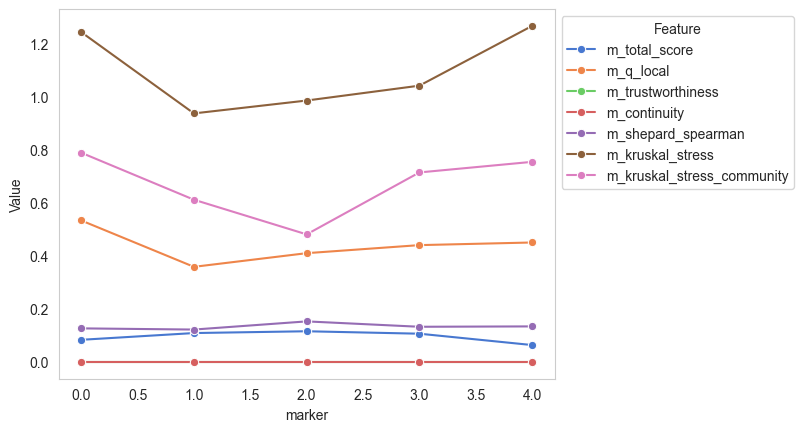

In [14]:
visualization.plot_metrics_report(metrics_df_uci159)

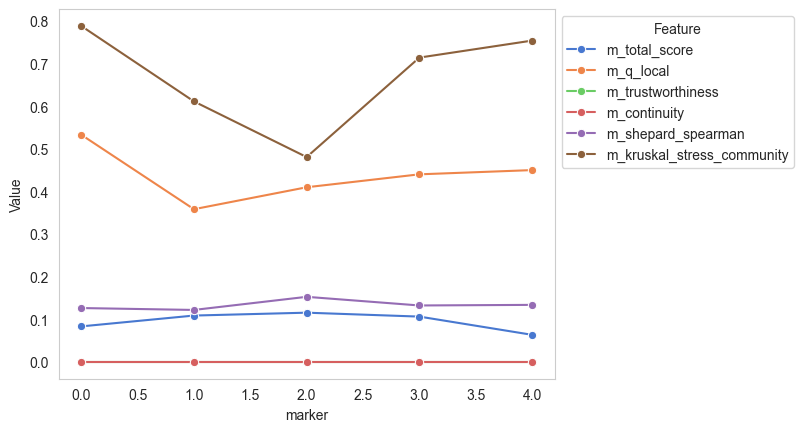

In [15]:
metrics_df_uci159 = metrics_df_uci159.drop("m_kruskal_stress", axis=1)
visualization.plot_metrics_report(metrics_df_uci159)

## Interactive Visualization

In [16]:
import utils

utils.save_pickle(embeddings_uci159, filename="results_ml_dr_uci159")

In [ ]:
import utils

embeddings_uci159 = utils.load_pickle(filename="results_ml_dr_uci159_20250508-170711")

In [ ]:
for emb in embeddings_uci159:
    emb.labels = {i: X_uci159.at[i, target_feature_uci159] for i in range(len(X_uci159))}

In [ ]:
from dash_overlay import DashOverlay

dash_app = DashOverlay(embeddings_uci159)

In [ ]:
dash_app.run()